# Import libraries

In [27]:
import pandas as pd
import numpy as np
from itertools import cycle
import time
import statistics

import sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from scipy import interp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import the custom helper files

In [28]:
from algorithm_helpers import *
from visualisation_helpers import *

In [29]:
#Optional
import warnings
warnings.filterwarnings('ignore') # Logistic regression does not converge and the warnings are pretty long

# Load the dataset

In [30]:
path = '../../datasets/vehicles.csv'  # Path to dataset
df = pd.read_csv(path)

In [31]:
X = df.drop(labels='Class', axis=1)  # Drop the target attribute from the X variable
y = df.Class  # The target attribute to be predicted

In [32]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [33]:
MLA_dict = get_algorithms()
MLA = [clf for clf in MLA_dict.values()]
cv_split = model_selection.KFold(n_splits=10, shuffle=True)
MLA_com, MLA_pred = run_models(MLA, X, y, train_X, train_y, test_X, cv_split)

In [34]:
MLA_com

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.914632,0.851134,0.122078,0.005029
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.836223,0.798950,0.090560,0.849299
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.815998,0.787395,0.125487,0.104647
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.870634,0.783838,0.163486,0.149166
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.796562,0.781429,0.154081,0.008415
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.843973,0.774174,0.094228,0.091901
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.988967,0.768487,0.126499,0.762102
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.777384,0.758725,0.103688,0.007445
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.991856,0.757717,0.123950,0.036028
9,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.763069,0.754076,0.139929,0.010877


In [35]:
clf = discriminant_analysis.QuadraticDiscriminantAnalysis()
clf.fit(train_X, train_y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [36]:
print('Training accuracy:', clf.score(train_X, train_y))
print('Test accuracy:', clf.score(test_X, test_y))

Training accuracy: 0.9171597633136095
Test accuracy: 0.8529411764705882


## Confusion matrix

This gives us an idea of how confused the model is by displaying the true/false positives/negatives, quite understandable from the plot itself.

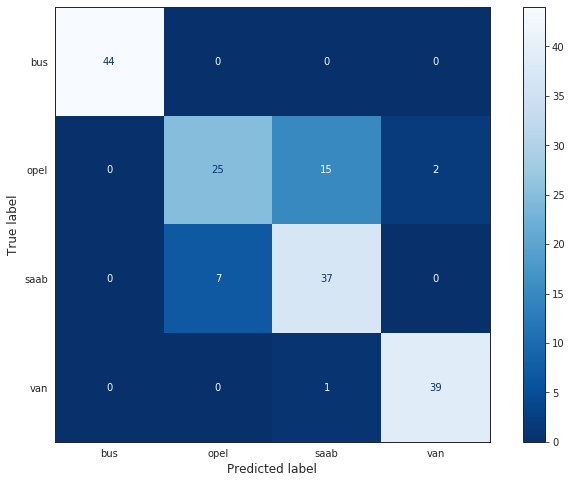

In [37]:
conf = metrics.plot_confusion_matrix(clf, test_X, test_y, cmap=plt.cm.Blues_r)
print(conf)

We can clearly infer the following things from here:
* Perfect classification of the class **bus**
* Near to perfect classification of the class **van**
* Average classification of the class **saab**
* Below average classification of the class **opel**

Now let us plot the confusion matrix for Random Forest:

Training accuracy: 0.7100591715976331
Test accuracy: 0.6882352941176471


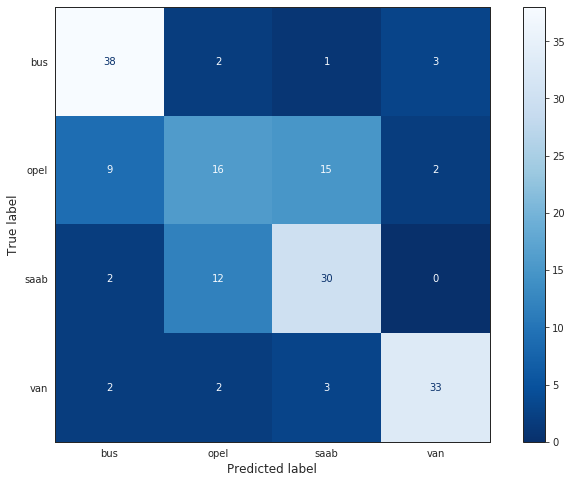

In [38]:
clf = linear_model.LogisticRegression()
clf.fit(train_X, train_y)
print('Training accuracy:', clf.score(train_X, train_y))
print('Test accuracy:', clf.score(test_X, test_y))
conf = metrics.plot_confusion_matrix(clf, test_X, test_y, cmap=plt.cm.Blues_r)
print(conf)

Simple logistic regression gives terrible results, and misclassifies the classes where QDA has almost 100% accuracy.

## What can we do with the given misclassification statistics?

From the comparison table, we find that QDA performs considerably better than other algorithms for this dataset. We keep in mind that QDA works by weighing the important features and giving them more importance. This means that we have some redundant features, removing which, it will work well with other classifiers too.

Dimensionality reduction is important as it:
* Prevents Overfitting: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures both real and random effects).
* Simplicity: An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.
* Computational Efficiency: A model trained on a lower-dimensional dataset is computationally more efficient (execution of algorithm requires less computational time).

Hence, to reduce the number of features we map them to a smaller feature space using Principal Component Analysis (PCA). PCA combines multiple dependant features into one feature which would tend to be independent of the other features in the sample space. In other words it achieves dimensionality reduction by transforming features into orthogonal component axes of maximum variance in a dataset.

An alternative to PCA is Linear Discriminant Analysis (LDA). The goal of LDA is to find the feature subspace that optimizes class separability and reduces dimensionality. LDA is a supervised algorithm unlike PCA.

We will first do PCA and if it does not work, we will go for LDA.

## Principal component analysis

PCA requires standardization of the data, so we do it before proceeding.

In [39]:
scaler = StandardScaler()
scaler.fit(train_X)

scaled_train_X = scaler.transform(train_X)
scaled_test_X = scaler.transform(test_X)

In [40]:
pca = decomposition.PCA(0.99)  # Keeps 99% of the variance
pca.fit(scaled_train_X)
scaled_train_X = pca.fit_transform(scaled_train_X)
scaled_test_X = pca.transform(scaled_test_X)
pca.n_components_  # Number of features after reduction

11

I have tried reducing the variance level (or number of components) but it does not help with the accuracy.

In [41]:
clf = ensemble.RandomForestClassifier()
print(clf.fit(scaled_train_X, train_y))
print(clf.score(scaled_test_X, test_y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7411764705882353


In [42]:
clf = linear_model.LogisticRegression()
print(clf.fit(scaled_train_X, train_y))
print(clf.score(scaled_test_X, test_y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7529411764705882


In [43]:
clf = svm.SVC()
print(clf.fit(scaled_train_X, train_y))
print(clf.score(scaled_test_X, test_y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.7411764705882353


Applying PCA does not help, rather it decreases the accuracy. It may be due to the swiss roll problem where the feature space forms a fold across the dimensions and reducing them leads to wrong interpretation of data.

Hence we need to use some other method to reduce dimensions. We will try LDA now.

## Linear discriminant analysis

In [44]:
scaled_train_X = scaler.transform(train_X)
scaled_test_X = scaler.transform(test_X)
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=3)
scaled_train_X = lda.fit_transform(scaled_train_X, train_y)
scaled_test_X = lda.transform(scaled_test_X)

In [45]:
clf = ensemble.RandomForestClassifier()
print(clf.fit(scaled_train_X, train_y))
print(clf.score(scaled_test_X, test_y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7823529411764706


Performance in case of RF is same as without any dimension reduction.

In [46]:
clf = linear_model.LogisticRegression()
print(clf.fit(scaled_train_X, train_y))
print(clf.score(scaled_test_X, test_y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8117647058823529


From 0.68 to 0.81 :)

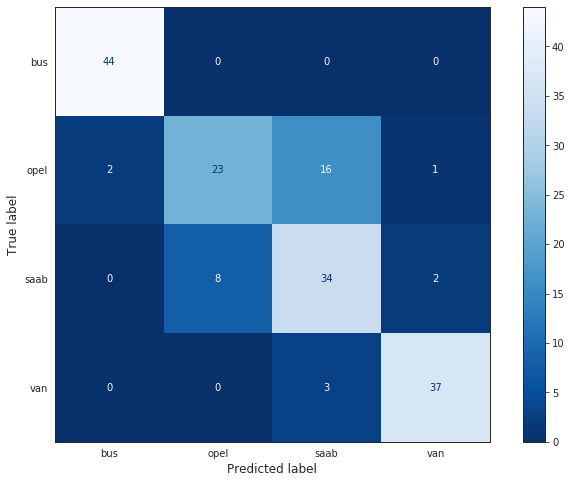

In [48]:
conf = metrics.plot_confusion_matrix(clf, scaled_test_X, test_y, cmap=plt.cm.Blues_r)
print(conf)

Quite some recovery indeed!

In [21]:
clf = svm.SVC()
print(clf.fit(scaled_train_X, train_y))
print(clf.score(scaled_test_X, test_y))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8235294117647058


There is considerable improvement over not only PCA but over the original model as well after dimensionality reduction using LDA for SVC and LR.

Moreover, it is to be noted that we are using only 3 features for LDA, which means we have reduced the number of features from 18 to 3, which is incredible and which means that there is huge redundancy in features :D

# Future scope

* The data can be better tabulated
* More classifiers can be tested.